In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
df=pd.read_csv("C:\\Users\\User\\Desktop\\Machine Learning\\Pandas\\Datasets\\bmi.csv")
df.head()   #to get the first 5 rows

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


# Exploratory Data Analysis (EDA)

In [311]:
df.shape   #to get the amount of columns and rows

(500, 4)

In [313]:
df.isnull().sum()   #to check for null values

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [315]:
df[df.columns].nunique()    #to check amount of unique values for each column 

Gender      2
Height     60
Weight    110
Index       6
dtype: int64

In [317]:
df["Gender"].value_counts()

Gender
Female    255
Male      245
Name: count, dtype: int64

In [319]:
df.duplicated().sum() # to get the count of duplicated values

11

In [321]:
df['Index'].value_counts()

Index
5    198
4    130
2     69
3     68
1     22
0     13
Name: count, dtype: int64

In [323]:
df["Index"]=df["Index"].map({0:"Severely Underweight" , 1:"Underweight" ,
                                 2:"Normal" , 3:"Overweight" , 
                                 4:"Obesity" , 5:"Extreme Obesity"})

In [325]:
df['Index'].value_counts()

Index
Extreme Obesity         198
Obesity                 130
Normal                   69
Overweight               68
Underweight              22
Severely Underweight     13
Name: count, dtype: int64

In [327]:
df["BMI"]=df.apply(lambda x: int((x["Weight"] / (x["Height"])**2 ) *10000 ) , axis=1)

In [329]:
df['BMI'].value_counts().head()

BMI
22    21
38    18
34    17
29    17
32    16
Name: count, dtype: int64

# Data Visualization

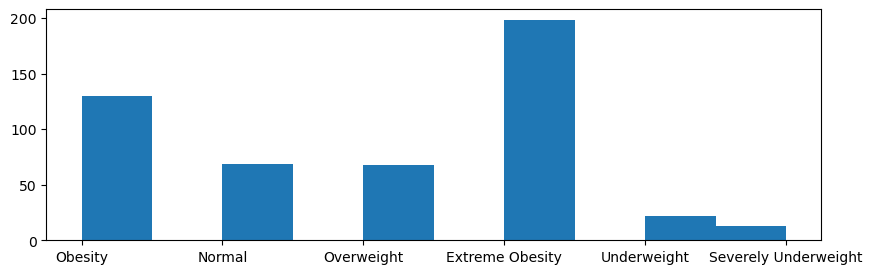

In [331]:
plt.figure(figsize=(10,3))
plt.hist(df['Index'])
plt.show()

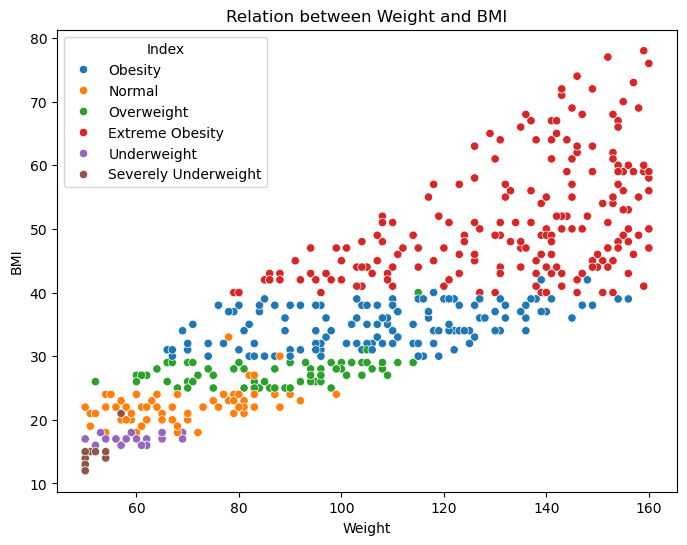

In [271]:
plt.figure(figsize=(8 , 6))
sns.scatterplot(x="Weight", y="BMI",hue="Index" ,data=df )
plt.title("Relation between Weight and BMI")
plt.show()

Text(0.5, 1.0, 'Relation between Height and BMI')

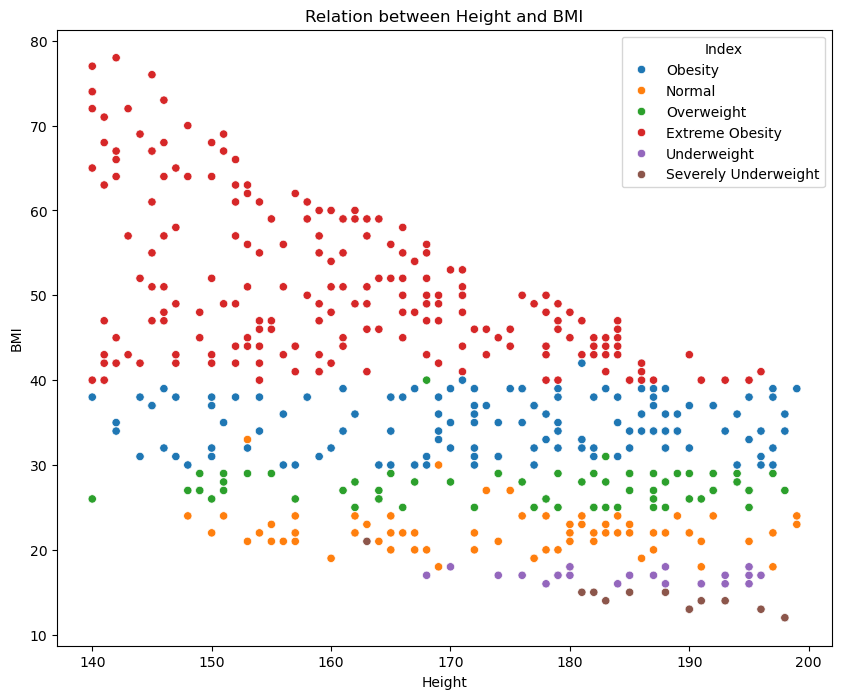

In [333]:
plt.figure(figsize=(10 , 8))
sns.scatterplot(x="Height", y="BMI",hue="Index" ,data=df )
plt.title("Relation between Height and BMI")

In [337]:
df.head()

,Gender,Height,Weight,Index,BMI
0,Male,174,96,Obesity,31
1,Male,189,87,Normal,24
2,Female,185,110,Obesity,32
3,Female,195,104,Overweight,27
4,Male,149,61,Overweight,27


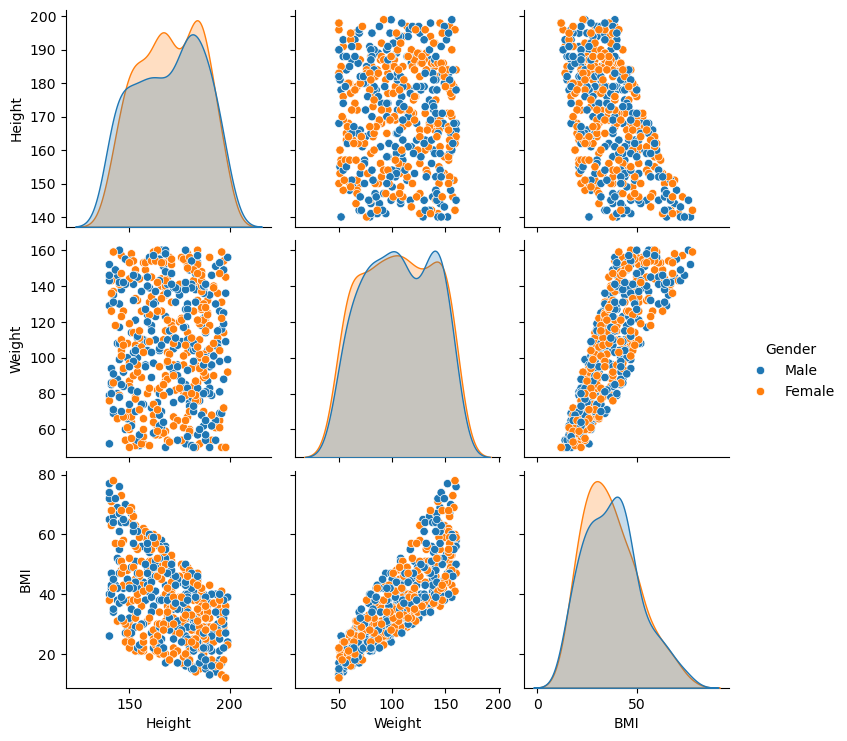

In [339]:

sns.pairplot(data=df, hue="Gender")
plt.show()

Text(0.5, 1.0, 'Index in male and female')

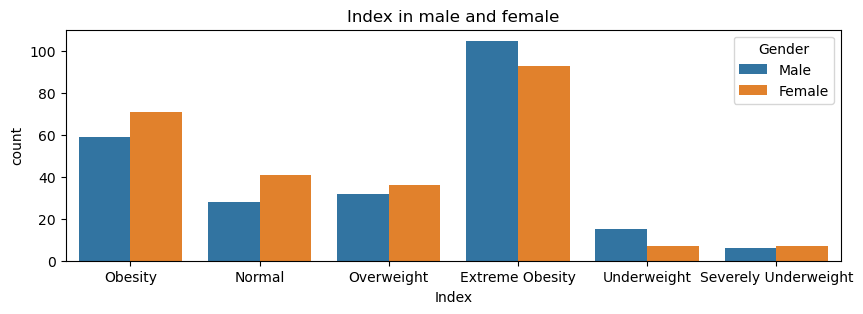

In [343]:
plt.figure(figsize=(10,3))
sns.countplot(x="Index" , hue="Gender" , data=df)
plt.title("Index in male and female")

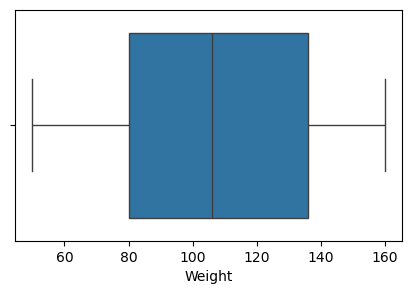

In [345]:
plt.figure(figsize=(5,3))
sns.boxplot(x='Weight',data=df)
plt.show()

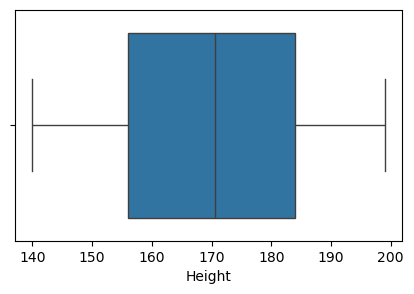

In [347]:
plt.figure(figsize=(5,3))
sns.boxplot(x='Height',data=df)
plt.show()

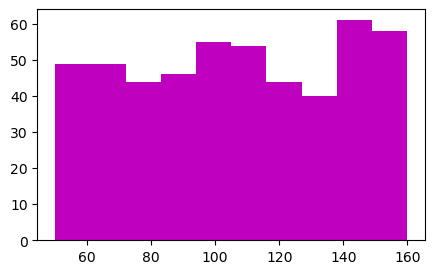

In [349]:
plt.figure(figsize=(5,3))
plt.hist(df['Weight'], color= 'm')
plt.show()

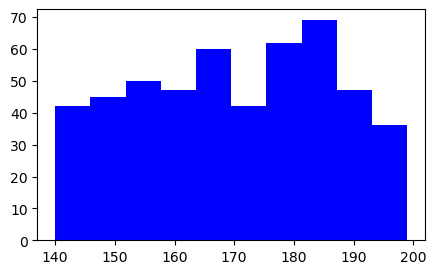

In [351]:
plt.figure(figsize=(5,3))
plt.hist(df['Height'],color= 'b')
plt.show()

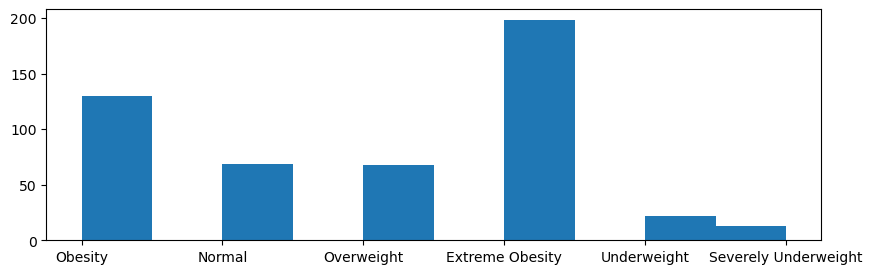

In [355]:
plt.figure(figsize=(10,3))
plt.hist(df['Index'])
plt.show()

# Encoding Categorical columns

In [357]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()

columns_to_encode = ['Gender', 'Index']

for col in columns_to_encode:
    df[col] = la.fit_transform(df[col])
df.head()

,Gender,Height,Weight,Index,BMI
0,1,174,96,2,31
1,1,189,87,1,24
2,0,185,110,2,32
3,0,195,104,3,27
4,1,149,61,3,27


In [420]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[['Height', 'Weight','BMI']] = scaler.fit_transform(df[['Height', 'Weight','BMI']])

# Train Test

In [422]:
x= df.drop("Index",axis=1)
y= df["Index"]

In [424]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=.25, random_state=42)

In [426]:
df.head()

,Gender,Height,Weight,Index,BMI
0,1,0.247939,-0.309117,2,-0.448579
1,1,1.164872,-0.587322,1,-0.950667
2,0,0.920357,0.123647,2,-0.376853
3,0,1.531645,-0.061823,3,-0.735487
4,1,-1.280283,-1.391027,3,-0.735487


In [381]:
df.corr()

,Gender,Height,Weight,Index,BMI
Gender,1.000000,-0.017677,0.009523,0.001278,0.028630
Height,-0.017677,1.000000,0.000446,0.442360,-0.531691
Weight,0.009523,0.000446,1.000000,-0.609276,0.827259
Index,0.001278,0.442360,-0.609276,1.000000,-0.723522
BMI,0.028630,-0.531691,0.827259,-0.723522,1.000000


# Model

In [428]:
from sklearn.linear_model import LogisticRegression

In [430]:
log= LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [491]:
pred = log.predict(x_test)
acc = accuracy_score(y_test, pred)
acc*100

93.60000000000001

In [447]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Metrics
print("Accuracy:", accuracy_score(y_test, pred)*100)
print("Precision:", precision_score(y_test, pred,average='weighted')*100)
print("Recall:", recall_score(y_test, pred,average='weighted')*100)
print("F1 Score:", f1_score(y_test, pred,average='weighted')*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

Accuracy: 93.60000000000001
Precision: 93.61682487725041
Recall: 93.60000000000001
F1 Score: 93.2839057001986
Confusion Matrix:
 [[46  0  2  0  0  0]
 [ 0 20  1  3  0  0]
 [ 1  0 37  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0  4]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


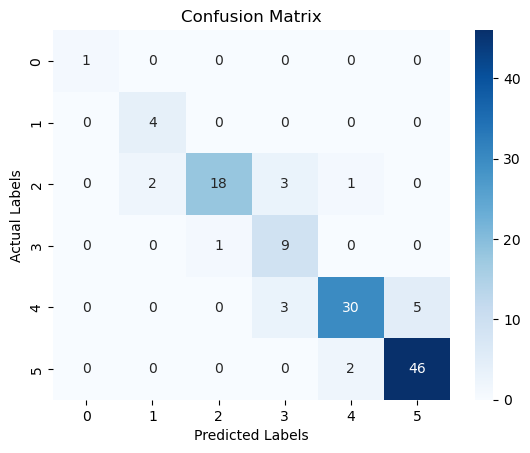

In [449]:
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [487]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [489]:
rd.score(x_test,y_test)*100

96.8